In [1]:
import matplotlib
import matplotlib.pyplot as plt 
%matplotlib inline
import pandas as pd 
import numpy as np
import seaborn as sns


import os
from sklearn import datasets, metrics
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
import time

from sklearn.metrics import mean_absolute_error, mean_squared_error, explained_variance_score, r2_score

np.random.seed(42)
import warnings 
warnings.filterwarnings('ignore')

In [2]:
#Loading Dataset with relative path
ed = pd.read_csv('energydata_complete.csv')
ed

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.890000,47.596667,19.200000,44.790000,19.790000,44.730000,19.000000,...,17.033333,45.5300,6.600000,733.5,92.000000,7.000000,63.000000,5.300000,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.890000,46.693333,19.200000,44.722500,19.790000,44.790000,19.000000,...,17.066667,45.5600,6.483333,733.6,92.000000,6.666667,59.166667,5.200000,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.890000,46.300000,19.200000,44.626667,19.790000,44.933333,18.926667,...,17.000000,45.5000,6.366667,733.7,92.000000,6.333333,55.333333,5.100000,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.890000,46.066667,19.200000,44.590000,19.790000,45.000000,18.890000,...,17.000000,45.4000,6.250000,733.8,92.000000,6.000000,51.500000,5.000000,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.890000,46.333333,19.200000,44.530000,19.790000,45.000000,18.890000,...,17.000000,45.4000,6.133333,733.9,92.000000,5.666667,47.666667,4.900000,10.084097,10.084097
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19730,2016-05-27 17:20:00,100,0,25.566667,46.560000,25.890000,42.025714,27.200000,41.163333,24.700000,...,23.200000,46.7900,22.733333,755.2,55.666667,3.333333,23.666667,13.333333,43.096812,43.096812
19731,2016-05-27 17:30:00,90,0,25.500000,46.500000,25.754000,42.080000,27.133333,41.223333,24.700000,...,23.200000,46.7900,22.600000,755.2,56.000000,3.500000,24.500000,13.300000,49.282940,49.282940
19732,2016-05-27 17:40:00,270,10,25.500000,46.596667,25.628571,42.768571,27.050000,41.690000,24.700000,...,23.200000,46.7900,22.466667,755.2,56.333333,3.666667,25.333333,13.266667,29.199117,29.199117
19733,2016-05-27 17:50:00,420,10,25.500000,46.990000,25.414000,43.036000,26.890000,41.290000,24.700000,...,23.200000,46.8175,22.333333,755.2,56.666667,3.833333,26.166667,13.233333,6.322784,6.322784


In [3]:
#Data Pre-Processing
def myPreProc(ed):
    procData = ed.dropna(how = 'all', axis = 1, inplace = False)
    procData = procData.dropna() 
    procData['Power'] = procData['Appliances'].astype(int) + procData['lights'].astype(int)
    procData = procData.drop('Appliances', axis = 1);
    procData = procData.drop('lights', axis = 1);
    procData = procData.drop('rv1', axis = 1);
    procData = procData.drop('rv2', axis = 1);
    procData = procData.drop('date', axis = 1);
    return procData
procData = myPreProc(ed)
procData.isna().sum();
procData

,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,...,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,Power
0,19.890000,47.596667,19.200000,44.790000,19.790000,44.730000,19.000000,45.566667,17.166667,55.200000,...,48.900000,17.033333,45.5300,6.600000,733.5,92.000000,7.000000,63.000000,5.300000,90
1,19.890000,46.693333,19.200000,44.722500,19.790000,44.790000,19.000000,45.992500,17.166667,55.200000,...,48.863333,17.066667,45.5600,6.483333,733.6,92.000000,6.666667,59.166667,5.200000,90
2,19.890000,46.300000,19.200000,44.626667,19.790000,44.933333,18.926667,45.890000,17.166667,55.090000,...,48.730000,17.000000,45.5000,6.366667,733.7,92.000000,6.333333,55.333333,5.100000,80
3,19.890000,46.066667,19.200000,44.590000,19.790000,45.000000,18.890000,45.723333,17.166667,55.090000,...,48.590000,17.000000,45.4000,6.250000,733.8,92.000000,6.000000,51.500000,5.000000,90
4,19.890000,46.333333,19.200000,44.530000,19.790000,45.000000,18.890000,45.530000,17.200000,55.090000,...,48.590000,17.000000,45.4000,6.133333,733.9,92.000000,5.666667,47.666667,4.900000,100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19730,25.566667,46.560000,25.890000,42.025714,27.200000,41.163333,24.700000,45.590000,23.200000,52.400000,...,50.074000,23.200000,46.7900,22.733333,755.2,55.666667,3.333333,23.666667,13.333333,100
19731,25.500000,46.500000,25.754000,42.080000,27.133333,41.223333,24.700000,45.590000,23.230000,52.326667,...,49.790000,23.200000,46.7900,22.600000,755.2,56.000000,3.500000,24.500000,13.300000,90
19732,25.500000,46.596667,25.628571,42.768571,27.050000,41.690000,24.700000,45.730000,23.230000,52.266667,...,49.660000,23.200000,46.7900,22.466667,755.2,56.333333,3.666667,25.333333,13.266667,280
19733,25.500000,46.990000,25.414000,43.036000,26.890000,41.290000,24.700000,45.790000,23.200000,52.200000,...,49.518750,23.200000,46.8175,22.333333,755.2,56.666667,3.833333,26.166667,13.233333,430


In [4]:
#Splitting of Data
X = procData.drop('Power', axis=1)
y = y=procData['Power']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

In [5]:
#RandomForest Model Fitting
rf_model = RandomForestRegressor(random_state=42)
P_rf = rf_model.fit(X_train, y_train)

In [6]:
y_train_pred = rf_model.predict(X_train)
print('The training R_square is: %.2f'% r2_score(y_train, y_train_pred))
print('The MAE is:%2.f'%mean_absolute_error(y_train, y_train_pred))
print('MSE is: %2.f'%mean_squared_error(y_train, y_train_pred))
print('The RMSE is: %2.f'% np.sqrt(mean_squared_error(y_train, y_train_pred)))

The training R_square is: 0.93
The MAE is:12
MSE is: 699
The RMSE is: 26


In [7]:
y_test_pred = rf_model.predict(X_test)
print('The testing R_square is: %.2f'% r2_score(y_test, y_test_pred))
print('The MAE is:%2.f'%mean_absolute_error(y_test, y_test_pred))
print('MSE is: %2.f'%mean_squared_error(y_test, y_test_pred))
print('The RMSE is: %2.f'% np.sqrt(mean_squared_error(y_test, y_test_pred)))

The testing R_square is: 0.55
The MAE is:34
MSE is: 5059
The RMSE is: 71


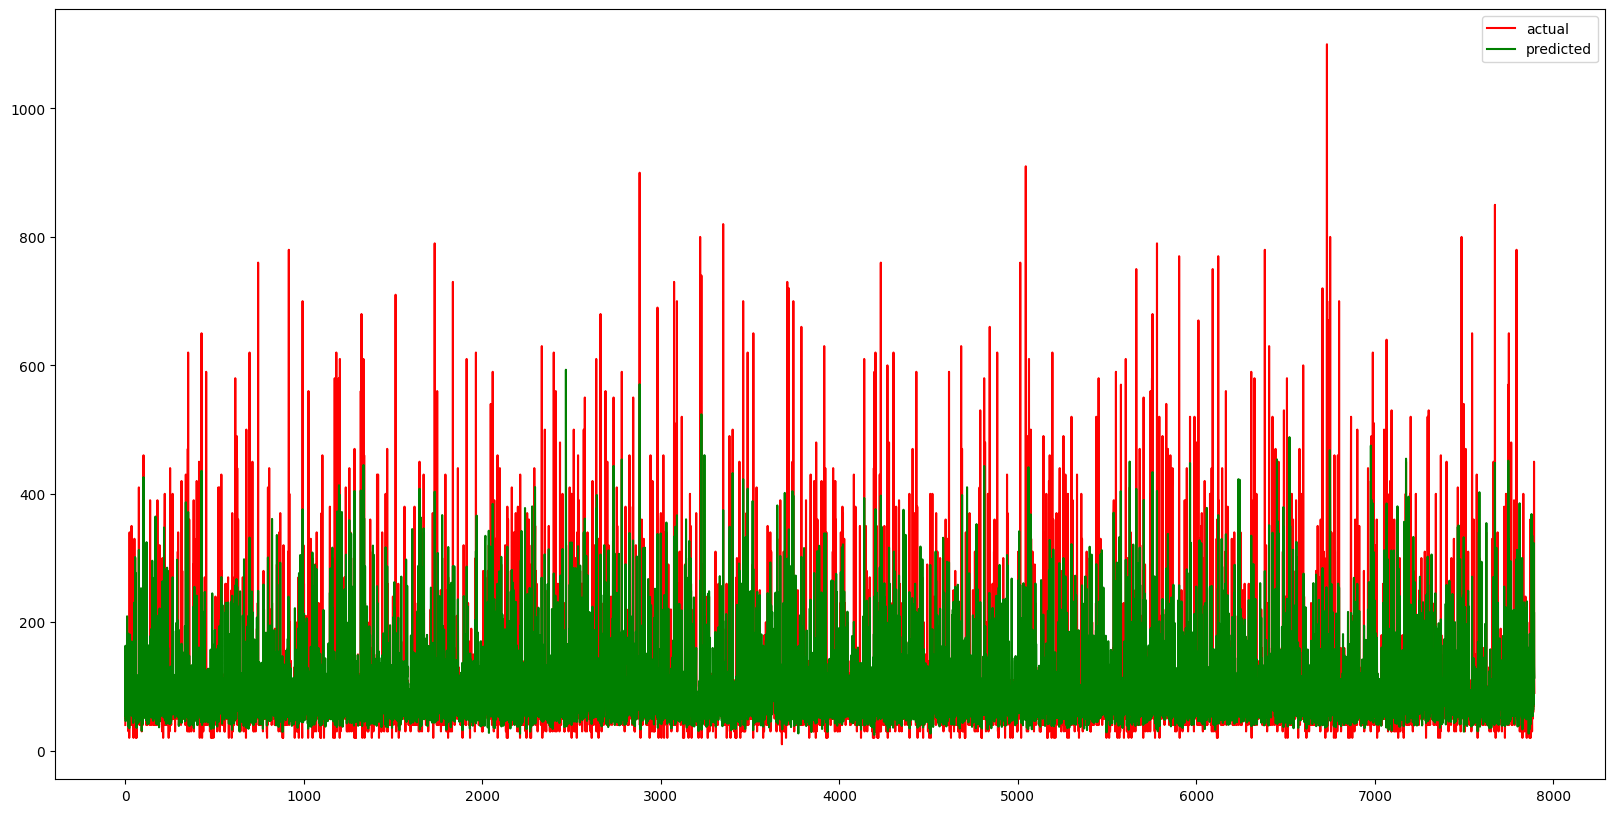

In [8]:
plt.rcParams['figure.figsize'] = (20,10)
x_ax = range(len(X_test))
plt.plot(x_ax, y_test, label = 'actual', color='red', linestyle = '-')
plt.plot(x_ax, y_test_pred, label = 'predicted', color = 'green', linestyle = '-')
plt.legend()

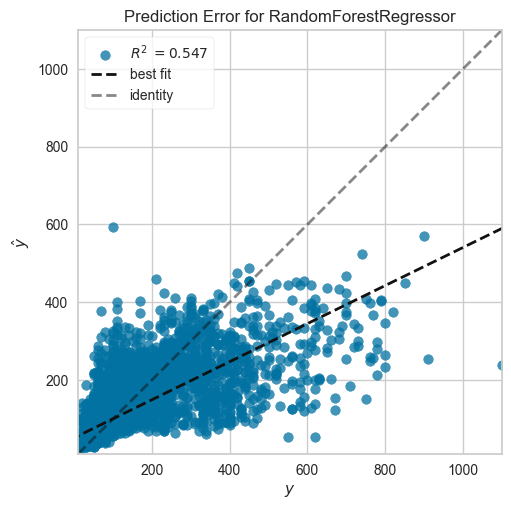

<AxesSubplot: title={'center': 'Prediction Error for RandomForestRegressor'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [9]:
# Plotting Prediction errors using Yellowbrick
from yellowbrick.regressor import PredictionError
visualiser = PredictionError(P_rf)
visualiser.fit(X_train, y_train)
visualiser.score(X_test, y_test)
visualiser.poof()

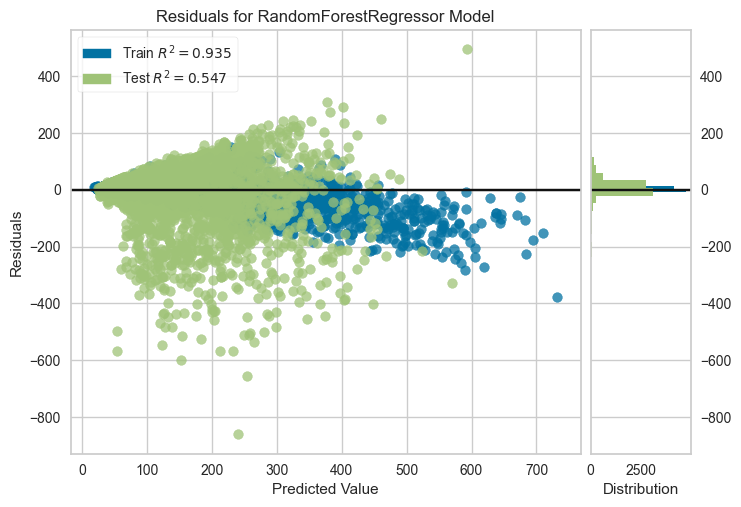

<AxesSubplot: title={'center': 'Residuals for RandomForestRegressor Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [10]:
from yellowbrick.regressor import ResidualsPlot
visualiser = ResidualsPlot(P_rf)
visualiser.fit(X_train, y_train)
visualiser.score(X_test, y_test)
visualiser.poof()

In [11]:
#Random Forest Feature Importance

feature_list = list(X.columns)
feature_importance = pd.Series(P_rf.feature_importances_, index=feature_list).sort_values(ascending=False)
print(feature_importance)

RH_1           0.073442
RH_3           0.060976
T3             0.053707
Press_mm_hg    0.052507
RH_out         0.051148
RH_2           0.050770
RH_5           0.049476
RH_8           0.048257
RH_9           0.045447
RH_7           0.044971
T8             0.042563
T2             0.041407
T5             0.040248
T4             0.040121
RH_6           0.038415
RH_4           0.036261
T1             0.035042
Tdewpoint      0.032325
T6             0.032121
T7             0.029091
Windspeed      0.029027
T_out          0.026331
T9             0.025302
Visibility     0.021046
dtype: float64


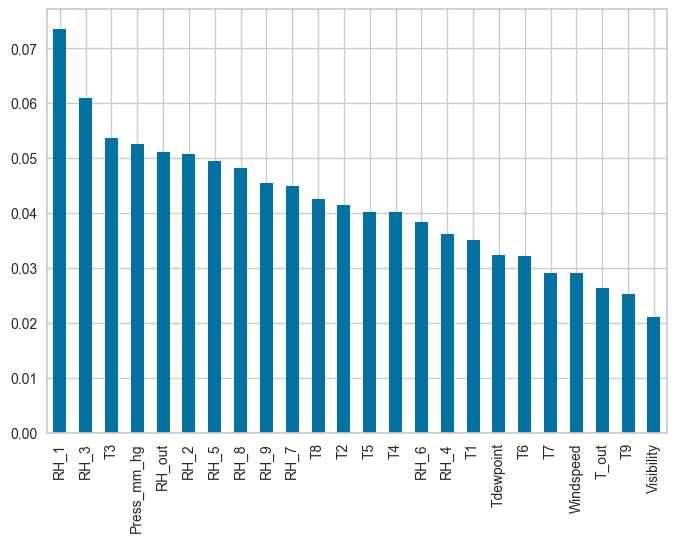

In [12]:
importances = pd.Series(feature_importance, index=X.columns).nlargest(24).plot(kind='bar')

In [13]:
#Dropping of columns after feature selection
procData2 = procData.drop('T9', axis = 1)
procData2 = procData2.drop('T_out', axis = 1)
procData2 = procData2.drop('Visibility', axis = 1)
procData2

,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,...,T7,RH_7,T8,RH_8,RH_9,Press_mm_hg,RH_out,Windspeed,Tdewpoint,Power
0,19.890000,47.596667,19.200000,44.790000,19.790000,44.730000,19.000000,45.566667,17.166667,55.200000,...,17.200000,41.626667,18.2000,48.900000,45.5300,733.5,92.000000,7.000000,5.300000,90
1,19.890000,46.693333,19.200000,44.722500,19.790000,44.790000,19.000000,45.992500,17.166667,55.200000,...,17.200000,41.560000,18.2000,48.863333,45.5600,733.6,92.000000,6.666667,5.200000,90
2,19.890000,46.300000,19.200000,44.626667,19.790000,44.933333,18.926667,45.890000,17.166667,55.090000,...,17.200000,41.433333,18.2000,48.730000,45.5000,733.7,92.000000,6.333333,5.100000,80
3,19.890000,46.066667,19.200000,44.590000,19.790000,45.000000,18.890000,45.723333,17.166667,55.090000,...,17.133333,41.290000,18.1000,48.590000,45.4000,733.8,92.000000,6.000000,5.000000,90
4,19.890000,46.333333,19.200000,44.530000,19.790000,45.000000,18.890000,45.530000,17.200000,55.090000,...,17.200000,41.230000,18.1000,48.590000,45.4000,733.9,92.000000,5.666667,4.900000,100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19730,25.566667,46.560000,25.890000,42.025714,27.200000,41.163333,24.700000,45.590000,23.200000,52.400000,...,24.500000,44.500000,24.7000,50.074000,46.7900,755.2,55.666667,3.333333,13.333333,100
19731,25.500000,46.500000,25.754000,42.080000,27.133333,41.223333,24.700000,45.590000,23.230000,52.326667,...,24.557143,44.414286,24.7000,49.790000,46.7900,755.2,56.000000,3.500000,13.300000,90
19732,25.500000,46.596667,25.628571,42.768571,27.050000,41.690000,24.700000,45.730000,23.230000,52.266667,...,24.540000,44.400000,24.7000,49.660000,46.7900,755.2,56.333333,3.666667,13.266667,280
19733,25.500000,46.990000,25.414000,43.036000,26.890000,41.290000,24.700000,45.790000,23.200000,52.200000,...,24.500000,44.295714,24.6625,49.518750,46.8175,755.2,56.666667,3.833333,13.233333,430


In [14]:
#Test Train Split and Standardization of newly processed data
X = procData2.drop('Power', axis=1)
y = procData2['Power']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
scaler = StandardScaler()
scaler.fit(X_train)
X_train_std = scaler.transform(X_train)
X_test_std = scaler.transform(X_test)

In [15]:
rf_model_std = RandomForestRegressor(random_state=42)
P_rf_std = rf_model_std.fit(X_train_std, y_train)

In [16]:
y_train_pred_std = rf_model_std.predict(X_train_std)
print('The training R_square is: %.2f'% r2_score(y_train, y_train_pred_std))
print('The MAE is:%2.f'%mean_absolute_error(y_train, y_train_pred_std))
print('MSE is: %2.f'%mean_squared_error(y_train, y_train_pred_std))
print('The RMSE is: %2.f'% np.sqrt(mean_squared_error(y_train, y_train_pred_std)))

The training R_square is: 0.94
The MAE is:12
MSE is: 670
The RMSE is: 26


In [17]:
y_test_pred_std = rf_model_std.predict(X_test_std)
print('The testing R_square is: %.2f'% r2_score(y_test, y_test_pred_std))
print('The MAE is:%2.f'%mean_absolute_error(y_test, y_test_pred_std))
print('MSE is: %2.f'%mean_squared_error(y_test, y_test_pred_std))
print('The RMSE is: %2.f'% np.sqrt(mean_squared_error(y_test, y_test_pred_std)))

The testing R_square is: 0.58
The MAE is:32
MSE is: 4472
The RMSE is: 67


In [54]:
#input possible best values for the grid
n_estimators = [40, 150] # No. of trees in RF
max_depth = [None] # Maximum no. of levels in tree
min_samples_split = [2]# Min. samples required to split node
min_samples_leaf = [1] # Min. samples required at each node

After multiple trials with the below parameters, it was identified that the other than n_estimators, max_depth, min_samples_split, min_samples_leaf all prefer the default values.
Based on RandomForestRegressor documentation the default values were identified and added to the parameter grid and from there certain variations were introduced to the values to find the best parameters.   

The following parameters were considered at the time of Hyperparameter tuning:   
n_estimators,int, default=100;   
max_depth,int, default=None;   
min_samples_split:int or float, default=2;   
min_samples_leaf,int or float, default=1;     
max_features{“sqrt”, “log2”, None}, int or float, default=1.0;   
bootstrap,bool, default=True;   

In [55]:
# Parameter grid created using dictionary
param_grid = {'n_estimators': n_estimators,
              'max_depth': max_depth,
              'min_samples_split': min_samples_split,
              'min_samples_leaf': min_samples_leaf}
print(param_grid)

{'n_estimators': [40, 150], 'max_depth': [None], 'min_samples_split': [2], 'min_samples_leaf': [1]}


In [56]:
#Hyperparameter Tuning with GridsearchCV to find best Parameters
rf_grid_model = RandomForestRegressor()
rf_Grid = GridSearchCV(estimator = rf_grid_model, param_grid =param_grid, cv=3, verbose=0) 
#Crossvalidation of 3
rf_Grid.fit(X_train_std, y_train)
rf_Grid.best_params_

{'max_depth': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 150}

In [57]:
#Standardised model's training metrics
y_train_pred_grid = rf_Grid.predict(X_train_std)
print('The training R_square is: %.2f'% r2_score(y_train, y_train_pred_grid))
print('The MAE is:%2.f'%mean_absolute_error(y_train, y_train_pred_grid))
print('MSE is: %2.f'%mean_squared_error(y_train, y_train_pred_grid))
print('The RMSE is: %2.f'% np.sqrt(mean_squared_error(y_train, y_train_pred_grid)))

The training R_square is: 0.94
The MAE is:12
MSE is: 664
The RMSE is: 26


In [58]:
#Standardised Grid model's testing metrics
y_test_pred_grid = rf_Grid.predict(X_test_std)
print('The testing R_square is: %.2f'% r2_score(y_test, y_test_pred_grid))
print('The MAE is:%2.f'%mean_absolute_error(y_test, y_test_pred_grid))
print('MSE is: %2.f'%mean_squared_error(y_test, y_test_pred_grid))
print('The RMSE is: %2.f'% np.sqrt(mean_squared_error(y_test, y_test_pred_grid)))

The testing R_square is: 0.58
The MAE is:32
MSE is: 4463
The RMSE is: 67


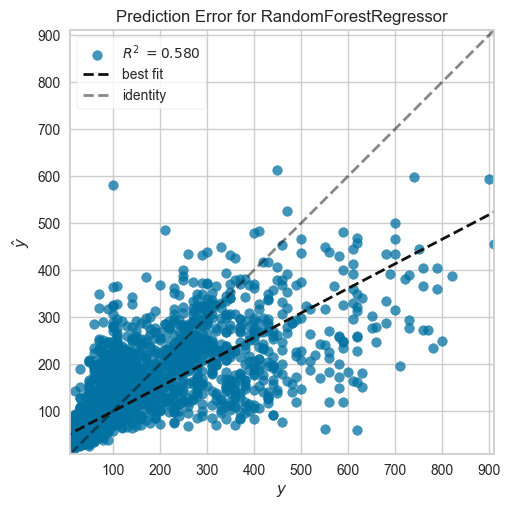

<AxesSubplot: title={'center': 'Prediction Error for RandomForestRegressor'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [59]:
visualiser = PredictionError(rf_grid_model)
visualiser.fit(X_train, y_train)
visualiser.score(X_test, y_test)
visualiser.poof()

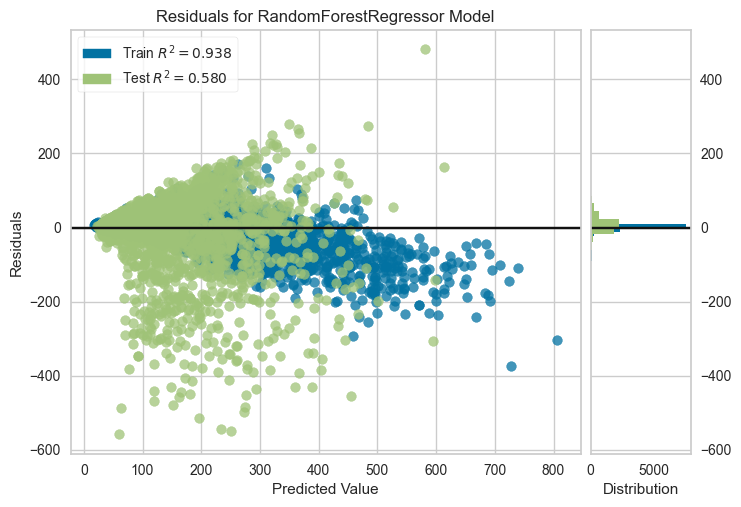

<AxesSubplot: title={'center': 'Residuals for RandomForestRegressor Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [60]:
from yellowbrick.regressor import ResidualsPlot
visualiser = ResidualsPlot(rf_grid_model)
visualiser.fit(X_train, y_train)
visualiser.score(X_test, y_test)
visualiser.poof()

In [61]:
import time
start = time.time()
rf_grid_model.fit(X_train_std, y_train)
y_pred = rf_grid_model.predict(X_test_std)
stop = time.time()
Execution_time = (stop - start) * 1000
print("Execution time: {:.2f} milliseconds".format(Execution_time))

Execution time: 42534.34 milliseconds
